<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad3/Exploracion_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 3

### Exploración Y Visualización Dataset Lending Club**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________



   


## **1. Contexto de la práctica**    <a id='id1'> </a>

- En la primera parte, se enfocará en **comprender los objetivos y requisitos del dataset a utilizar desde una perspectiva comercial**, comenzando con la comprensión de cómo funciona el **club de prestamos Lending Club**.

### **Club de préstamos**

LendingClub es una compañía estadounidense de **préstamos entre pares**, con sede en San Francisco, California. Es la plataforma de préstamos peer-to-peer más grande del mundo.

**LendingClub**
- permite a los **prestatarios solicitar préstamos personales no garantizados** entre  1,000 y 40,000.
- Los **inversionistas pueden buscar y explorar las listas de préstamos** en el sitio web de LendingClub **y seleccionar los préstamos en los que desean invertir según la información proporcionada sobre el prestatario, el monto del préstamo, el grado del préstamo y el propósito del préstamo**, con una inversión mínima de $25.
- Los inversionistas ganan dinero con los intereses.
- LendingClub gana dinero cobrando a los prestatarios una tarifa de originación y a los inversionistas una tarifa de servicio.

Para obtener más información sobre la empresa, consulte el artículo de wikipedia sobre [LendingClub](https://en.wikipedia.org/wiki/LendingClub).


-  En la segunda parte, se realizará una regresion logistica.


## **2. Evaluar Dataset**   <a id='id2'> </a>

El archivo de datos **lending_club_2007_2011_6_states.csv** contiene la información del préstamo y del prestatario para los préstamos iniciados entre 2007 y 2011 en seis estados, California, Nueva York, Florida, Texas, Nueva Jersey e Illinois.

El archivo de diccionario de datos **data_dictionary.csv** contiene descripciones de todas las columnas del archivo de datos.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_dict = pd.read_csv("data_dictionary.csv", encoding= "ISO-8859-1")
data_dict

,ColumnName,Descripcion,Description
0,acc_now_delinq,El número de cuentas en las que el prestatario...,The number of accounts on which the borrower i...
1,addr_state,El estado proporcionado por el prestatario en ...,The state provided by the borrower in the loan...
2,annual_inc,Los ingresos anuales autodeclarados proporcion...,The self-reported annual income provided by th...
3,application_type,Indica si el préstamo es una solicitud individ...,Indicates whether the loan is an individual ap...
4,chargeoff_within_12_mths,Número de cancelaciones en 12 meses,Number of charge-offs within 12 months
5,collection_recovery_fee,tasa de cobro post cargo,post charge off collection fee
6,collections_12_mths_ex_med,Número de cobros en 12 meses excluyendo cobros...,Number of collections in 12 months excluding m...
7,debt_settlement_flag,"Indica si el prestatario, que ha cancelado, es...","Flags whether or not the borrower, who has cha..."
8,debt_settlement_flag_date,La fecha más reciente en la que se ha establec...,The most recent date that the Debt_Settlement_...
9,delinq_2yrs,El número de incidencias de morosidad de más d...,The number of 30+ days past-due incidences of ...


In [7]:
prestamos_df = pd.read_csv('lending_club_2007_2011_6_states.csv')
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


- Usar la función `loan_df.info()` para imprimir información básica del DataFrame.
- Al ejecutar la instruccion **info()**, se observa que existen datos incompletos.


In [8]:
prestamos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    19908 non-null  int64  
 1   funded_amnt                  19908 non-null  int64  
 2   funded_amnt_inv              19908 non-null  float64
 3   term                         19908 non-null  object 
 4   int_rate                     19908 non-null  float64
 5   installment                  19908 non-null  float64
 6   grade                        19908 non-null  object 
 7   sub_grade                    19908 non-null  object 
 8   emp_title                    18723 non-null  object 
 9   emp_length                   19409 non-null  object 
 10  home_ownership               19908 non-null  object 
 11  annual_inc                   19908 non-null  float64
 12  verification_status          19908 non-null  object 
 13  issue_d         

## **Variables comunes importantes**

#### **Características del préstamo:**
- loan_amnt: Monto solicitado del préstamo.
- int_rate: Tasa de interés del préstamo.
- term: Plazo del préstamo (36 o 60 meses).
- installment: Monto de la cuota mensual.

#### **Características del solicitante:**
- annual_inc: Ingreso anual declarado por el solicitante.
- emp_length: Años de experiencia laboral.
- home_ownership: Propiedad de vivienda (Renta, Propietario, Hipotecado).
- verification_status: Estado de verificación de ingresos.

####  C**aracterísticas relacionadas con la deuda:**
-  (Debt-to-Income Ratio): Relación deuda-ingreso.
- revol_bal: Saldo rotativo en tarjetas de crédito.
- revol_util: Porcentaje de utilización de crédito rotativo.
- total_acc: Número total de cuentas de crédito.

#### **Historial crediticio:**
- earliest_cr_line: Fecha de apertura de la primera línea de crédito.
- delinq_2yrs: Número de morosidades en los últimos 2 años.
- pub_rec: Número de registros públicos negativos (bancarrota, embargos).

#### **Otros factores:**
- purpose: Propósito del préstamo (p. ej., consolidación de deuda, pago de tarjetas).
- addr_state: Estado de residencia del solicitante

#####  El método `df.isnull().sum()` permite  verificar el recuento de valores nulos de cada columna.

In [9]:
prestamos_df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,1185
emp_length,499


- Imprimir las **estadísticas descriptivas** que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos.


In [10]:
prestamos_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,6998.000000,...,19908.000000,0.0,19893.0,0.0,19908.0,19908.0,19893.0,19908.0,19595.000000,19898.0
mean,11353.846444,11065.763763,10500.929748,12.089717,330.614254,7.107345e+04,13.008619,0.143962,0.829466,35.841097,...,2636.253711,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.037969,0.0
std,7463.700492,7176.276661,7106.229650,3.698287,210.557434,6.980565e+04,6.663658,0.489576,1.044978,21.599170,...,4412.964304,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.191393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5750.000000,5600.000000,5000.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,0.000000,19.000000,...,222.530000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,10000.000000,9000.000000,11.860000,285.780000,6.000000e+04,13.075000,0.000000,0.000000,34.000000,...,544.700000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14500.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,1.000000,51.000000,...,3193.352500,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,8.000000,106.000000,...,35596.410000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,2.000000,0.0


##  **3. Analisis Exploratorio de los Datos - EDA**<a id='id3'> </a>

EDA es un enfoque para analizar conjuntos de datos para **resumir sus características principales**, a menudo con visualizaciones.

Para características **categóricas**, podemos verificar:
- Valores únicos en la categoría.
- Recuento de cada categoría.
- Agregación de otras características continuas para cada categoría.

Para características **continuas**, podemos verificar:
- Distribuciones
- Correlaciones de múltiples características

Haremos una demostración de EDA con dos características, plazo del préstamo y tasa de interés.

### **3.1 Plazo del prestamo y taza de interés**  <a id='id31'> </a>

Explorar la característica del plazo del préstamo, la tasa de interés y la relación entre ellos.

Durante el analisis, **descubrimos que**:
- Hay dos plazos diferentes, **36 meses y 60 meses**.
- Hay aproximadamente **tres veces más préstamos a 36 meses** que préstamos a 60 meses en el conjunto de datos.
- La **tasa de interés** está en el **rango de 5% a 25%**.
- La mayoría de los préstamos tienen una tasa de interés entre **5-17%**.
- Los **préstamos a 36 meses** tienen una **tasa de interés promedio significativamente más baja que la de los préstamos a 60 meses**.

#### **Plazo del prestamo**

In [11]:
# Mostrar los valores unicos en la columna plazo, nos damos cuenta que
# Hay dos plazos diferentes, **36 meses y 60 meses.

prestamos_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [12]:
# Contar ocurrencias de cada plazo
# 14, 852 prestamos a un plazo de 36 meses y
# 5,056 prestamos a 60 meses
# Hay aproximadamente tres veces más préstamos a 36 meses que
# préstamos a 60 meses en el conjunto de datos.

prestamos_df.term.value_counts()

,count
term,
36 months,14852
60 months,5056


In [13]:
sns.set_theme(rc={'figure.figsize':(6, 4)})
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Text(0, 0.5, 'Número de prestamos')

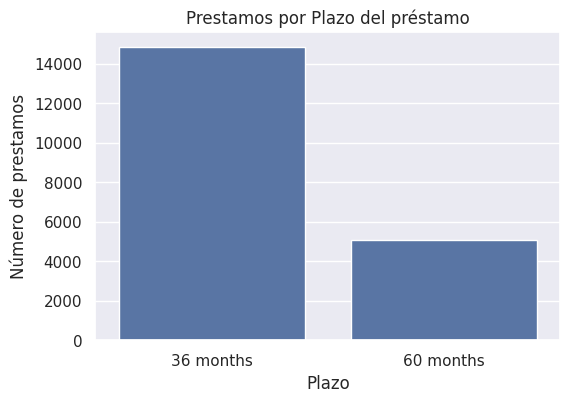

In [14]:
# Podemos usar un grafico de barras para mostrar los conteos de
# observaciones en cada contenedor categórico usando barras.

# Un gráfico de conteo se puede considerar como un histograma para
# una variable categórica, en lugar de una variable cuantitativa.

ax = sns.countplot(x = 'term', data=prestamos_df, order=sorted(prestamos_df.term.unique()))
ax.set_title('Prestamos por Plazo del préstamo')
ax.set_xlabel('Plazo')
ax.set_ylabel('Número de prestamos')


#### **Taza de Interes**

<Axes: >

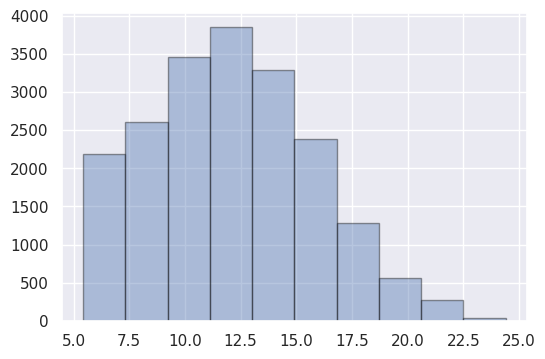

In [15]:
# Generamos un histograma para verificar la distribucion de
# la taza de interes,   con esto nos damos cuenta que ..
# La mayoría de los préstamos tienen una tasa de interés entre 5 y el 17.5 %.

prestamos_df.int_rate.hist(edgecolor='black', alpha=0.4)

####   **Promedio de Interés de diferentes plazos**

In [16]:
# Calculamos la taza promedio por plazo y nos damos cuenta que:

# Los préstamos a 36 meses tienen una tasa de interés promedio significativamente más
# baja que la de los préstamos a 60 meses

prestamos_df.groupby('term').agg({'int_rate':'mean'})

,int_rate
term,
36 months,11.121125
60 months,14.934955


Text(0.5, 0, 'Plazo')

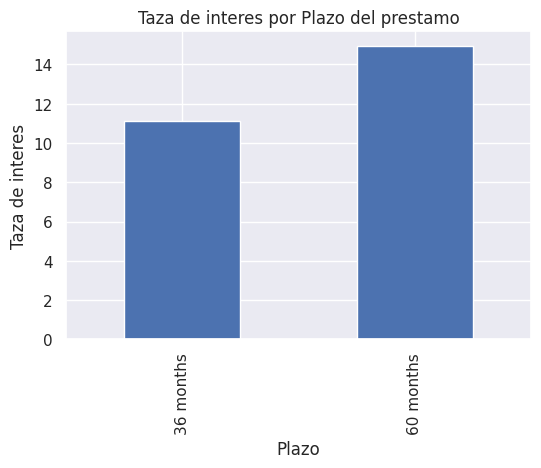

In [17]:
#  Graficamos el cálculo anterior

# Los préstamos a 36 meses tienen una tasa de interés promedio significativamente
# más baja que la de los préstamos a 60 meses

ax = prestamos_df.groupby('term').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Taza de interes por Plazo del prestamo')
ax.set_ylabel('Taza de interes')
ax.set_xlabel('Plazo')

### **3.2 Calificación del préstamo**   <a id='id32'> </a>

- En casode que Lending Club opta por aprobar su solicitud, le **asigna una calificación crediticia (que mide la probabilidad de incumplimiento del préstamo) y la tasa de interés de su préstamo**. Las calificaciones de préstamos incluyen una letra (A - G)
- La calificación **A1, la calificación de mayor calidad**, pueden esperar **tasas de interés bajas de alrededor de 5.99%** sobre el préstamo de 36 meses, mientras que aquellos con calificación G5 pueden esperar tasas de 35.89% sobre el préstamo de 36 meses.

¿Cuántas calificaciones de préstamo diferentes hay en el conjunto de datos?

- **grade** es una **variable categórica**, podemos usar **value_counts()** para verificar los recuentos de cada categoría.
- Un gráfico de recuento de Seaborn es una buena manera de visualizar características categóricas.
- Trazamos un gráfico de barras (con gráficos de seaborn countplot) para el grado.
- El **eje X es la calificación del préstamo (grade)** y el **eje Y es el recuento de préstamos (loans)**. Para ordenar la calificación del préstamo, puede configurar **order=sorted(loan_df.grade.unique())** en el gráfico de conteo.

In [18]:
prestamos_df.grade.value_counts()

,count
grade,
B,6065
A,4875
C,4087
D,2748
E,1434
F,540
G,159


In [19]:
prestamos_df.groupby('grade').agg({'grade':'count'})

,grade
grade,
A,4875
B,6065
C,4087
D,2748
E,1434
F,540
G,159


Text(0, 0.5, 'Cantidad de prestamos')

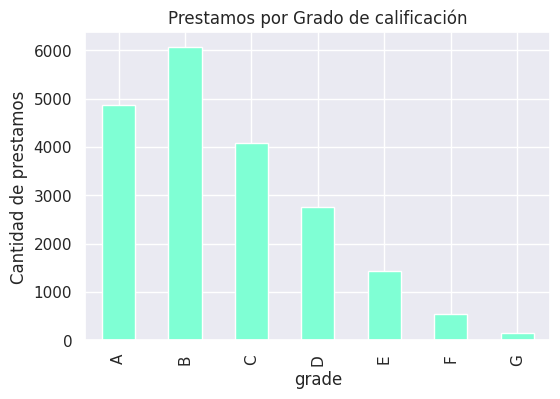

In [20]:
# Podemos graficar directamente con el metodo plot de dataframe
# matplotlib no es muy adecuadopara elmanejo de colores
# en su lugar se puede usar la libreria seaborn que permite especificar paletas de colores

ax = prestamos_df.groupby('grade').agg({'grade':'count'}).plot.bar(legend = False, color='aquamarine' )
ax.set_title('Prestamos por Grado de calificación')
ax.set_ylabel('Cantidad de prestamos')



Text(0.5, 1.0, 'Prestamos por Grado de calificación del prestamo')

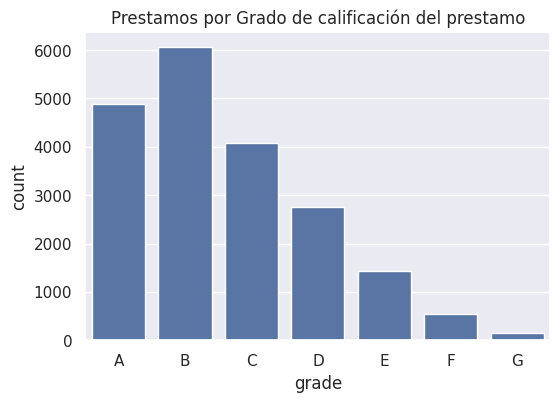

In [21]:
# Tambien podemos usar la libreria seaborn
# usando countplot

ax = sns.countplot(x = 'grade',data = prestamos_df, order=sorted( prestamos_df.grade.unique() ) )
ax.set_title('Prestamos por Grado de calificación del prestamo')

/tmp/ipython-input-558457158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='grade',data=prestamos_df, palette="Set3", order=sorted(prestamos_df.grade.unique()))


Text(0.5, 1.0, 'Prestamos por Grado')

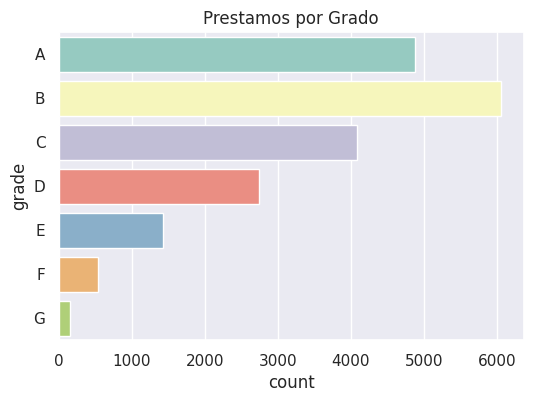

In [22]:
# Paa hacerlo horizontal, especificmos que el valor de grade lo ponemos
# en el eje y

ax = sns.countplot(y='grade',data=prestamos_df, palette="Set3", order=sorted(prestamos_df.grade.unique()))
ax.set_title('Prestamos por Grado')


### **3.3 Calificación del préstamo y tasa de interés**    <a id='id33'> </a>

Explorar la relación entre la calificacion del préstamo y la tasa de interés.

- Obtener la tasa de interés promedio para cada grado de préstamo.
  - Agrupar por la columna de calificación.
  - Aplicar la función agregada de la media en la columna int_rate.
- Visualizar la tasa de interés promedio de cada grado de préstamo con un gráfico de barras. Asegúrese de que la grafica tenga las etiquetas y el título adecuados.
- Discutir la relación brevemente.

**Sugerencia**: Puede trazar directamente un gráfico de barras en un objeto groupby agregado. es decir.  
 `ax = df.groupby(...).agg(...).plot.bar()`

In [23]:
# Para calcular la taza de interes por la calificacion del prestamo
# Agrupamos por la columna de grado y
# Aplicamos la función agregada de la media en la columna de la taza de ineteres  int_rate.

prestamos_df.groupby('grade').agg({'int_rate':'mean'})

,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


Text(0, 0.5, 'Taza de interés')

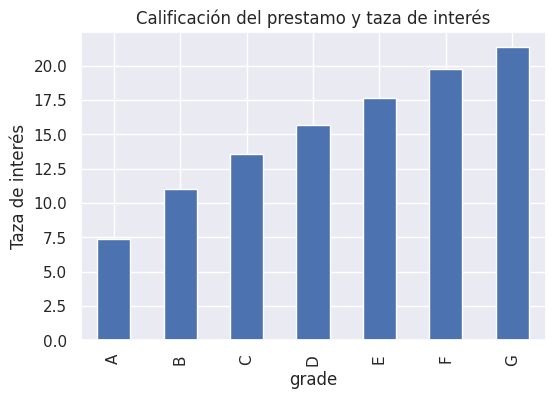

In [24]:
# Podemos graficar directamente con el metodo plot de dataframe

ax = prestamos_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Calificación del prestamo y taza de interés')
ax.set_ylabel('Taza de interés')

### **3.4 Préstamos por Estado**  <a id='id34'> </a>

- Hay préstamos de seis estados en el conjunto de datos.
- Explorar el recuento de préstamos en cada estado a través de la visualización.

- Visualizar recuentos de préstamos en cada estado.


In [25]:
prestamos_df.groupby('addr_state').agg({'addr_state':'count'})

,addr_state
addr_state,
CA,7105
FL,2872
IL,1525
NJ,1855
NY,3817
TX,2734


Text(0, 0.5, 'Estado')

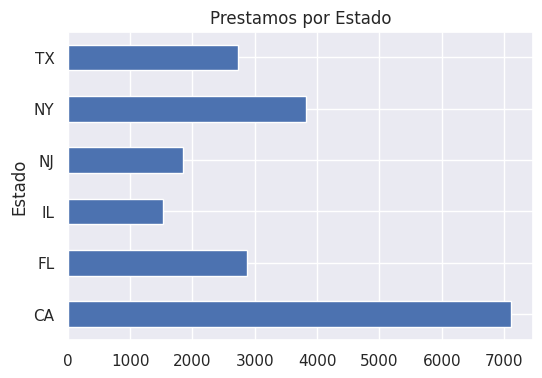

In [26]:
ax = prestamos_df.groupby('addr_state').agg({'addr_state':'count'}).plot.barh(legend = False)
ax.set_title('Prestamos por Estado')
ax.set_ylabel('Estado')

###  **3.5 Distribución Anual de Ingresos de los Prestatarios**   <a id='id35'> </a>

- Trazar un histograma de todos los ingresos anuales del prestatario.
- Trace otro histograma de ingresos anuales que sea inferior a $250.000.
- Comparar los diagramas  y discutir brevemente.

**Sugerencia**: Filtrar los  préstamos por ingreso anual, es decir,   
`prestamos_df[prestamos_df.annual_inc<250000]`


<Axes: >

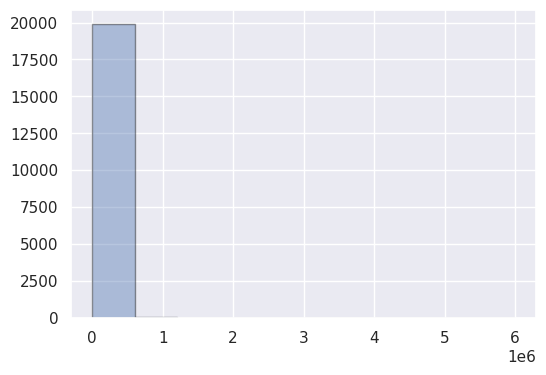

In [27]:
# histograma general del ingreso anual

prestamos_df.annual_inc.hist(edgecolor='black', alpha=0.4)

In [28]:
# Usamos la opcion describe para ver los estadisticos descriptivos de la columna ingreso Anual
# Servira para darnos una idea como esta la distribucion
prestamos_df.annual_inc.describe()

,annual_inc
count,1.990800e+04
mean,7.107345e+04
std,6.980565e+04
min,4.000000e+03
25%,4.200000e+04
50%,6.000000e+04
75%,8.500000e+04
max,6.000000e+06


<Axes: >

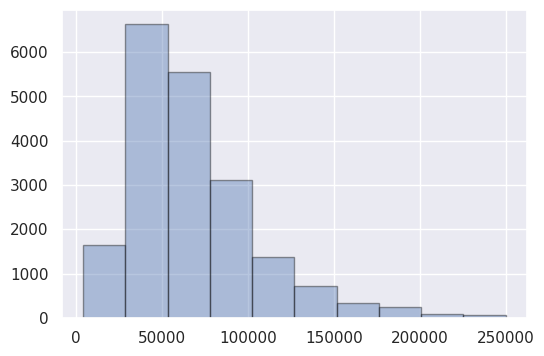

In [29]:
# histograma de los que ganan menos de 250 mil
prestamos_df[prestamos_df.annual_inc<250000].annual_inc.hist(edgecolor='black', alpha=0.4)

<Axes: >

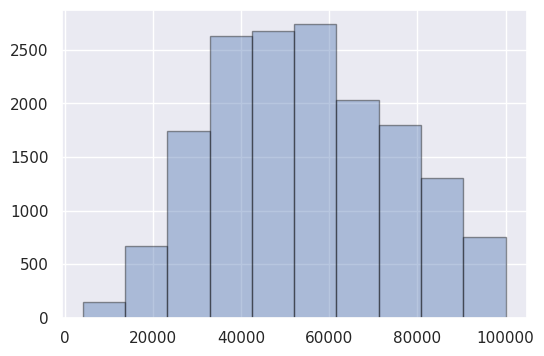

In [30]:
# histograma de los ue ganan menos de 100 mil
prestamos_df[prestamos_df.annual_inc<100000].annual_inc.hist(edgecolor='black', alpha=0.4)


### **3.6. Ingreso anual del prestatario por estado**  <a id='id36'> </a>

- Visualice el ingreso **medio** de los prestatarios de cada estado con un gráfico de barras.
  - **Agrupar** por la columna **addr_state**.
  - Aplicar la función agregada **mediana** en la columna anual_inc.

- Discutir el resultado brevemente

**Sugerencia**: Puede trazar directamente un gráfico de barras en un objeto groupby agregado. es decir.  
 `ax = df.groupby(...).agg(...).plot.bar()`

Text(0, 0.5, 'Estado')

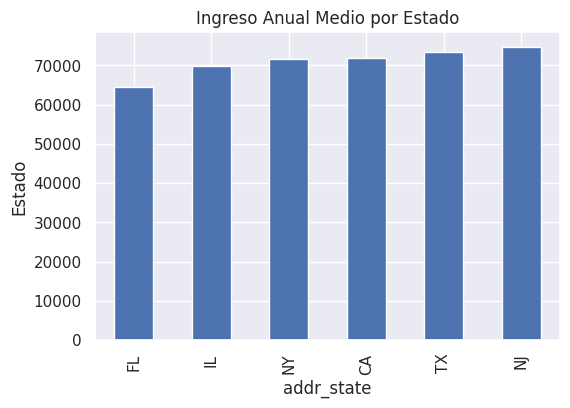

In [31]:
ax = prestamos_df.groupby('addr_state').agg({'annual_inc':'mean'}).sort_values("annual_inc").plot.bar(legend = False)
ax.set_title('Ingreso Anual Medio por Estado')
ax.set_ylabel('Estado')

###  **3.7 Ingreso Anual y Tasa de Interé**s   <a id='id37'> </a>

- Trazar un diagrama de dispersión sobre el ingreso anual y la tasa de interés
- Trazar otro diagrama de dispersión con un ingreso anual inferior a $300,000
- Discutir el resultado, **¿el diagrama de dispersión revela alguna correlación entre el ingreso anual y la tasa de interés?**

<Axes: xlabel='annual_inc', ylabel='int_rate'>

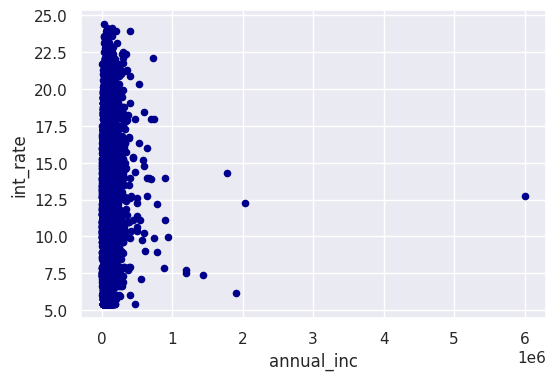

In [32]:
# diagrama de dispersion de ingresos anuales y taza de interes
prestamos_df.plot.scatter( x='annual_inc',  y='int_rate', c='DarkBlue')


<Axes: xlabel='annual_inc', ylabel='int_rate'>

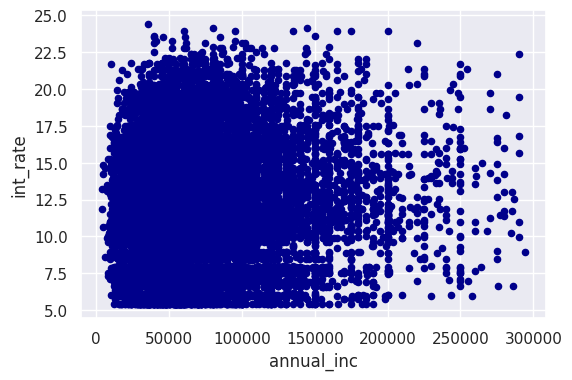

In [33]:
# diagrama de dispersion de ingresos anuales y taza de interes de los que ganan menos de 300 mil
prestamos_df[prestamos_df.annual_inc<300000].plot.scatter( x='annual_inc',  y='int_rate', c='DarkBlue')

<Axes: xlabel='int_rate', ylabel='annual_inc'>

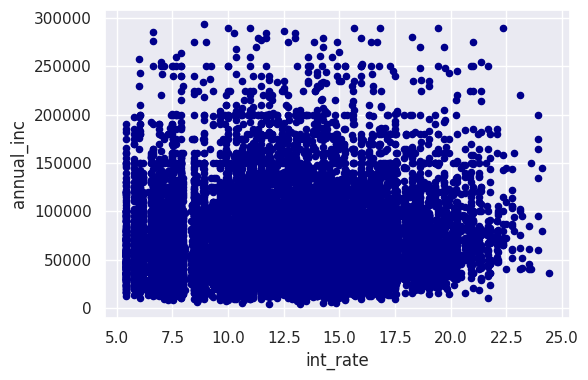

In [34]:
# diagrama de dispersion de ingresos anuales y taza de interes de los que ganan menos de 300 mil
# invertimos los ejes
prestamos_df[prestamos_df.annual_inc<300000].plot.scatter( x='int_rate',  y='annual_inc', c='DarkBlue')

### **3.8 Préstamos emitidos durante el año** <a id='id38'> </a>

- Debido a la forma en que viene la fecha, vamos a **convertir la informacion del campo issue_d (El mes en que se financió el préstamo) en tipo fecha**, para crear una nueva columna con el numero de año y poder graficar el numero de prestamos por año
- Convertir la columna **issue_d  (El mes en que se financió el préstamo)** a un tipo de fecha y hora
- Crear una nueva columna, **issue_year**, y configurarla en el año en que se emitió un préstamo
- Mostrar las primeras cinco filas


Explorar la cantidad de préstamos emitidos a través de LendingClub entre 2007 y 2011

- Obtener un conteo de préstamos en cada año (Sugerencia: **agrupar** por **issue_year** y aplique la función agregada 'recuento' en cualquier columna).
- Trazar un gráfico de líneas para ver la tendencia, el eje x es el año, el eje y es el conteo.

**Sugerencia**: Se Puede trazar directamente un gráfico de líneas en un objeto groupby agregado. es decir.  
 `ax = df.groupby(...).agg(...).plot.line()`

In [35]:
# verificar la informacion del campo  issue_d
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


In [36]:
# Convertir la columna issue_d (El mes en que se financió el préstamo) a un tipo de fecha y hora
prestamos_df['issue_d'] = pd.to_datetime(prestamos_df['issue_d'])

/tmp/ipython-input-3068530693.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prestamos_df['issue_d'] = pd.to_datetime(prestamos_df['issue_d'])


In [37]:
# verificar la informacion del campo  issue_d
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


In [38]:
# Crear una nueva columna, issue_year, y configúrela en el año en que se emitió un préstamo
prestamos_df['issue_year'] = prestamos_df['issue_d'].dt.year

In [39]:
# Verificamos
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011


#### **Ahora si ya podemos graficar el numero de prestamos por año**

Text(0, 0.5, 'Prestamos')

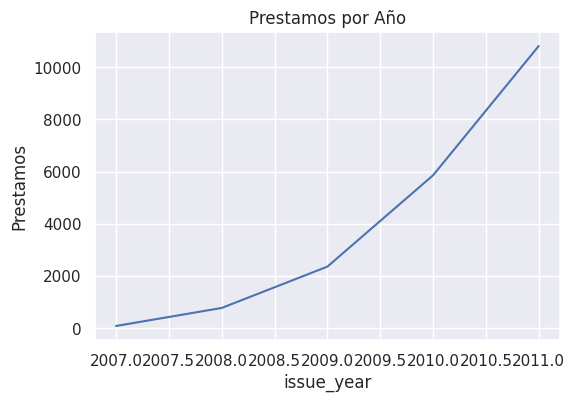

In [40]:
ax = prestamos_df.groupby('issue_year').agg({'annual_inc':'count'}).sort_values("annual_inc").plot.line(legend = False)
ax.set_title('Prestamos por Año')
ax.set_ylabel('Prestamos')

### **3.9 Evolución de la tasa de interés**   <a id='id39'> </a>

Explorar el cambio de la tasa de interés en cada estado a lo largo de los años.

- Crear tabla dinámica, establecer
  - index to issue_year
  - columns to addr_state
  - values to int_rate
  - aggfunc to median
- Trazar un gráfico de líneas para comparar el cambio de la tasa de interés promedio, durante los años en los 6 estados.

**Sugerencia**: Se puede trazar directamente un gráfico de líneas en una tabla dinámica. es decir. `ax = df.pivot_table(...).plot.line()`

In [41]:
prestamos_df.pivot_table( index='issue_year', columns='addr_state', values= 'int_rate', aggfunc=np.mean)

/tmp/ipython-input-3708765238.py:1: FutureWarning: The provided callable <function mean at 0x7e052b178220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  prestamos_df.pivot_table( index='issue_year', columns='addr_state', values= 'int_rate', aggfunc=np.mean)


addr_state,CA,FL,IL,NJ,NY,TX
issue_year,,,,,,
2007,10.338000,10.616538,8.540000,10.698667,11.145250,8.225000
2008,11.472444,10.935263,11.194833,11.430143,11.187348,10.927321
2009,12.232144,12.191182,11.966685,12.199434,12.479330,12.403735
2010,12.001526,11.643763,11.694765,12.122847,11.846824,11.757327
2011,12.236692,12.152918,12.281881,12.386044,12.221262,12.214518


/tmp/ipython-input-871756839.py:1: FutureWarning: The provided callable <function mean at 0x7e052b178220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  prestamos_df.pivot_table( index='issue_year', columns='addr_state', values= 'int_rate', aggfunc=np.mean).plot.line()


<Axes: xlabel='issue_year'>

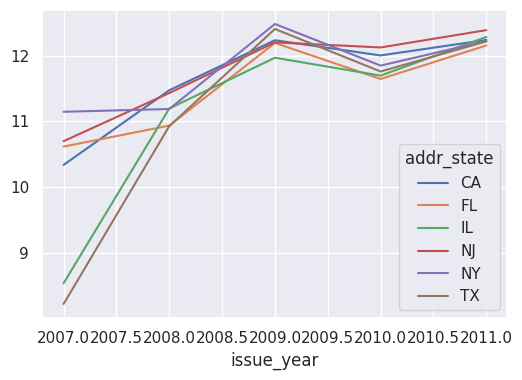

In [42]:
prestamos_df.pivot_table( index='issue_year', columns='addr_state', values= 'int_rate', aggfunc=np.mean).plot.line()

### **3.10  Estado del prestamo**  <a id='id310'> </a>

Los préstamos en el conjunto de datos se emitieron antes de 2011 y el plazo de préstamo más largo es de 5 años. Por lo tanto, todos los préstamos se pagan o se cancelan.

Explorar el estado del préstamo y descubra:
- El número de préstamos pagados y el numero de préstamos cancelados
- Tasa de pago de todo el conjunto de datos.  

$Taza de pago = \frac{TotalmentePagado}{Totalmente Pagado+Cargado}$  


$PaidOffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$  


In [43]:
prestamos = prestamos_df["loan_status"].value_counts()
prestamos

,count
loan_status,
Fully Paid,16965
Charged Off,2943


In [44]:
tazadePago = prestamos["Fully Paid"] / (prestamos["Fully Paid"] + prestamos["Charged Off"])
tazadePago

np.float64(0.8521699819168174)

### **3.11 Explorar la tasa de pago de préstamos a tres y cinco años.**   <a id='id311'> </a>

- Crear la tabla dinámica **tazaPago_x_plazo** a partir de loan_df, establecer
  - **index** to term
  - **columns** to loan_status
  - **values** to int_rate(or any column since we simply count)
  - **aggfunc** to count
- Calcular la tasa de cancelación de préstamos de diferentes plazos
   - Crear una nueva columna `payoffRate` en la tabla dinámica **tazaPago_x_plazo** que creó.
   - Calcular la tasa de pago para cada plazo de préstamo con la fórmula   
     
   $tazaPago = \frac{FullyPaid}{Fully Paid+Charged Off}$.  
       
- Mostrar la tabla dinámica.


In [45]:
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011


In [46]:
tazaPago_x_plazo = prestamos_df.pivot_table( index='term', columns='loan_status', values= 'int_rate', aggfunc=np.size)
tazaPago_x_plazo

loan_status,Charged Off,Fully Paid
term,,
36 months,1728,13124
60 months,1215,3841


In [47]:
# Calculamos la taza de pago de los diferentes plazos de pago
tazaPago_x_plazo["payoffRate"] = tazaPago_x_plazo["Fully Paid"] / ( tazaPago_x_plazo["Fully Paid"] + tazaPago_x_plazo["Charged Off"])
tazaPago_x_plazo

loan_status,Charged Off,Fully Paid,payoffRate
term,,,
36 months,1728,13124,0.883652
60 months,1215,3841,0.759691


### **3.12 Estado del préstamo y taza de pago por calificacion del prestamo** <a id='id312'> </a>

Explorar la tasa de pago de diferentes grados de préstamo.

- Crear una tabla dinámica **tazaPago_x_grado** a partir de préstamo_df, y establecer
  - **index** to grade
  - **columns** to loan_status
  - **values** to int_rate(or any column since we simply count)
  - **aggfunc** to count
- Calcular la tasa de cancelación de préstamos de diferentes grados
   - Crear una nueva columna `payoffRate` en la tabla dinámica **tazaPago_x_grado** que se acaba de hacer.
   - Calcular la tasa de pago para cada grado de préstamo con la fórmula:
   
    $tazaPago = \frac{FullyPaid}{Fully Paid+Charged Off}$.  
      
      
- Mostrar la tabla dinámica.


In [48]:
tazaPago_x_grado = prestamos_df.pivot_table( index='grade', columns='loan_status', values= 'int_rate', aggfunc=np.size)
tazaPago_x_grado

loan_status,Charged Off,Fully Paid
grade,,
A,304,4571
B,779,5286
C,672,3415
D,579,2169
E,378,1056
F,174,366
G,57,102


In [49]:
# Agregamos la columna Taza de pago por grado del credito  y   verificamos la taza de pago de los creditos
tazaPago_x_grado["payoffRate"] = tazaPago_x_grado["Fully Paid"] / ( tazaPago_x_grado["Fully Paid"] + tazaPago_x_grado["Charged Off"])
tazaPago_x_grado

loan_status,Charged Off,Fully Paid,payoffRate
grade,,,
A,304,4571,0.937641
B,779,5286,0.871558
C,672,3415,0.835576
D,579,2169,0.789301
E,378,1056,0.736402
F,174,366,0.677778
G,57,102,0.641509


## **4. Preparación de datos, modelado y evaluación de modelos**  <a id='id4'> </a>

La preparación de datos implica la limpieza de los datos, es decir, se ocupa de los valores faltantes y crea nuevas características a través de la ingeniería de características.

### **4.1 Codificar el estado del prestamo en una nueva columna**   <a id='id41'> </a>

- El conjunto de datos tiene préstamos iniciados entre 2007 y 2011.
- Todos **los préstamos han sido pagados en su totalidad o cancelados**.
- Agregar la columna 'repaid' () en prestamos_df codificando el estado del préstamo y mapeando:  

**loan_status**:
- Charged Off to 0
- Fully Paid to 1.


In [50]:
# Verificamos cuantos estan totalmente pagados y cuantos todavian están con cargo
prestamos_df.loan_status.value_counts()

,count
loan_status,
Fully Paid,16965
Charged Off,2943


In [51]:
# Agregamos una columna con valores 0 y 1 a partir de la columna  loan_status, es decir los
# que  estan totalmente pagados con un (1) y los que están cancelados en (0)
#  cancelados a 0   y pagados a 1
# La columna repaid se usara mas adelante como parte del modelo de clasificacion, y servira para predecir
# si un prestamos se pagará o no

mapping_dict = {'Charged Off':0, 'Fully Paid':1}
prestamos_df['repaid'] = prestamos_df.loan_status.map(mapping_dict)
prestamos_df.repaid.value_counts()

,count
repaid,
1,16965
0,2943


In [52]:
# Verifcamos al final la nueva columna
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0


### **Taza de pago**
Con la columna de pago recién creada, podemos **calcular la tasa de pago de todos los préstamos en el conjunto de datos** con el valor medio de la columna, que es aproximadamente el 85 %, como se muestra en la siguiente celda de código.

In [53]:
prestamos_df.repaid.mean()

np.float64(0.8521699819168174)

### **4.2 Codificar el Plazo del préstamo**   <a id='id42'> </a>

Crear una nueva columna `loan_term_year` en **loan_df**, que tiene un valor entero:
- 3 si el plazo del préstamo (term) es '36 meses'  (3 años)
- 5 si el plazo del préstamo (term) es '60 meses'.  (5 años)

A continuación, calcule la tasa de reembolso de los préstamos con diferente préstamo_término_año.  

**Sugerencia:** agrupe por `loan_term_year` y aplique la media de la función agregada en la columna `repaid`.

In [54]:
# Verificamos como viene el plazo
prestamos_df["term"].head()

,term
0,36 months
1,36 months
2,36 months
3,60 months
4,60 months


In [55]:
# Creamos una nueva columna con valores entero de acuerdo al plazo del prestamo
mapping_dict = {'36 months':3, '60 months':5}
prestamos_df['loan_term_year'] = prestamos_df.term.map(mapping_dict)
prestamos_df.loan_term_year.value_counts()

,count
loan_term_year,
3,14852
5,5056


In [56]:
prestamos_df.term.value_counts()

,count
term,
36 months,14852
60 months,5056


In [57]:
# calculamos la tasa de reembolso de los préstamos
prestamos_df.groupby("loan_term_year").agg( { "repaid" : "mean" } )

,repaid
loan_term_year,
3,0.883652
5,0.759691


###  **4.3 Codificar características categóricas**   <a id='id43'> </a>

Exploramos la relación entre las siguientes **variables categóricas y la taza de pago (variable repaid)**.
- purpose
- grade
- home_ownership
- addr_state

Luego **codificamos las variables categoricas a numéricas** creando las siguientes columnas nuevas en loan_df.

- purpose_code
- grade_code
- home_ownership_code
- addr_state_code

***Comprobar si faltan valores en las variables recién creadas.***

- Primero, verificamos la tasa de pago de los préstamos con diferentes propósitos y vemos los siguientes resultados
- Los préstamos para pequeñas empresas tienen la tasa de pago más baja
- los préstamos para automóviles y bodas tienen la tasa de pago más alta.
- También contamos el número de cada propósito.
- Puede contar cualquier columna en el conjunto de datos, por ejemplo, la columna issue_d.



In [58]:
# relación entre el propósito y la tasa de pago
# Como resultado podemos ver que
     # Los préstamos para pequeñas empresas tienen la tasa de pago  más baja
     # En cambio, los préstamos para automóviles y bodas tienen la tasa de pago más alta.
# tambien observamos que la mayoría de los préstamos en el conjunto de datos son para consolidación de deuda.

prestamos_df.groupby('purpose').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
purpose,,
small_business,0.728177,905
educational,0.801242,161
house,0.823864,176
moving,0.829653,317
other,0.843689,2060
debt_consolidation,0.845670,9389
medical,0.854286,350
vacation,0.859296,199
renewable_energy,0.862745,51


In [59]:
# Codificamos las variables categoricas usando la libreria sklearn   usando el metodo LabelEncoder
# Codificar las variables categoricas de destino con valores entre 0 y n_classes

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
prestamos_df['purpose_code'] = le.fit_transform(prestamos_df.purpose)

In [60]:
prestamos_df['purpose_code'].value_counts()

,count
purpose_code,
2,9389
1,2696
9,2060
4,1330
6,1048
11,905
0,687
13,539
7,350


### **Análisis de relación entre el estatus de la propiedad de la vivienda y la tasa de pago**

In [61]:
# relación entre el estatus de la propiedad de la vivienda y la tasa de pago
# Como resultado podemos ver que:
        #La mayoria de los deudores viven de renta o tienen la casa  hipotecada
# MORTGAGE ==  HIPOTECA

prestamos_df.groupby('home_ownership').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
home_ownership,,
OTHER,0.818182,44
OWN,0.841527,1546
RENT,0.847620,10966
MORTGAGE,0.861379,7351
NONE,1.000000,1


In [62]:
prestamos_df["home_ownership"].value_counts()

,count
home_ownership,
RENT,10966
MORTGAGE,7351
OWN,1546
OTHER,44
NONE,1


In [63]:
le = LabelEncoder()
prestamos_df['home_ownership_code'] = le.fit_transform(prestamos_df.home_ownership)

In [64]:
prestamos_df['home_ownership_code'].value_counts()

,count
home_ownership_code,
4,10966
0,7351
3,1546
2,44
1,1


### **Análisis de relación entre la calificacion del riesgo del credito  y la tasa de pago**

In [65]:
# relación entre el estatus de la calificacion del riesgo del credito  y la tasa de pago
# Como resultado podemos ver que
      #  los prestamos con clasificacion A (los de menor riesgo) tienen la mayor taza de pago
      # mientras que los clasificados como G (Mayor riesgo) tienen la menor taza de pago
#  Hay mas prestamos clasificados como B y, enseguida A y C

prestamos_df.groupby('grade').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
grade,,
G,0.641509,159
F,0.677778,540
E,0.736402,1434
D,0.789301,2748
C,0.835576,4087
B,0.871558,6065
A,0.937641,4875


In [66]:
le = LabelEncoder()
prestamos_df['grade_code'] = le.fit_transform(prestamos_df.grade)

In [67]:
prestamos_df['grade_code'].value_counts()

,count
grade_code,
1,6065
0,4875
2,4087
3,2748
4,1434
5,540
6,159


### **Análisis de relación entre el estado de residencia del deudor   y la tasa de pago**

In [68]:
# relación entre el estado de residencia del deudor  y la tasa de pago
# Como resultado podemos ver que california tiene el mayor numero de prestamos, mientras que illinois tiene el
# menor numero de prestamos, además, Texas tiene la mayor taza de pago, y florida tiene la menor taza de pago

prestamos_df.groupby('addr_state').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
addr_state,,
FL,0.822772,2872
CA,0.840816,7105
NJ,0.847978,1855
NY,0.868745,3817
IL,0.870164,1525
TX,0.882224,2734


In [69]:
le = LabelEncoder()
prestamos_df['addr_state_code'] = le.fit_transform(prestamos_df.addr_state)

In [70]:
prestamos_df['addr_state_code'].value_counts()

,count
addr_state_code,
0,7105
4,3817
1,2872
5,2734
3,1855
2,1525


In [71]:
# Verificamos los campos agregados, mostrando los primeros 10 registros
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,home_ownership_code,grade_code,addr_state_code
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Cash,N,NaN,2011,1,3,11,4,2,2
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Cash,N,NaN,2011,1,3,9,4,2,0
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Cash,N,NaN,2011,1,3,0,4,4,0
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Cash,N,NaN,2011,0,5,11,3,5,0
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Cash,N,NaN,2011,0,5,9,4,1,5


### **4.4 Manejar Valores perdidos**   <a id='id44'> </a>

- Algunas de las variables que utilizaremos para realizar la prediccion tiene valores nulos, por lo tanto, es enecesario llenar con datos los valores nulos. Se tiene que decidir cual sera la opcion para rellenar los valores nulos.


- Rellenar los valores que faltan en `revol_util` con el valor medio de la columna en prestamos_df.
- Se decide reemplazar los valores faltantes con la media porque es una variable de tipo continua y para no generar un sesgo en la informacion
- Rellenar los valores que faltan en `pub_rec_bankruptcies` con 0 (Número de quiebras de registros públicos) en prestamos_df. esta **es una variable categorica y rellenamos con 0 por ser el valor de la  moda**

Después de completar los valores faltantes, verificamos de nuevo prestamos_df para asegurarnos de que no haya valores faltantes en las dos columnas.
- Si aún faltan valores, es probable que no se utilizó la función fillna() de la manera correcta.
- fillna() de forma predeterminada devuelve una columna con los valores faltantes completados, por lo que debe volver a asignar la columna completa a la columna original o establecer `inplace=True` en fillna().
- Si establece `inplace=True` en fillna(), no asigne el valor devuelto a la columna original, ya que la función modificará directamente la función de loan_df en su lugar y no devolverá nada.

In [72]:
# Verificamos la columna 29 revol_util que tiene 19889 mientras que en el dataset son 19908 , por lo tanto
# 19,9098 - 19,889 = 19 registros con valores nulos
prestamos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_amnt                    19908 non-null  int64         
 1   funded_amnt                  19908 non-null  int64         
 2   funded_amnt_inv              19908 non-null  float64       
 3   term                         19908 non-null  object        
 4   int_rate                     19908 non-null  float64       
 5   installment                  19908 non-null  float64       
 6   grade                        19908 non-null  object        
 7   sub_grade                    19908 non-null  object        
 8   emp_title                    18723 non-null  object        
 9   emp_length                   19409 non-null  object        
 10  home_ownership               19908 non-null  object        
 11  annual_inc                   19908 non-nu

In [73]:
# Es mas facil si verificamos con la funcion isnull()
# Contar valores nulos de la columna revol_util

# revol_util  significa:
# Tasa de utilización de la línea renovable, o la cantidad de crédito que el prestatario
# está utilizando en relación con todo el crédito renovable disponible

prestamos_df["revol_util"].isnull().sum()

np.int64(19)

In [74]:
# Verificamos que valores tiene la columna revol util
# revol util ==
#  Tasa de utilización de la línea renovable, o la cantidad de crédito que el prestatario
#  está utilizando en relación con todo el crédito renovabl

prestamos_df['revol_util'].value_counts()

,count
revol_util,
0.00,455
0.20,38
78.70,34
32.00,34
57.40,33
...,...
6.75,1
36.94,1
5.34,1


In [75]:
# Calculamos el promedio de la columna  revol_util

avg_revol_util = prestamos_df['revol_util'].astype('float').mean(axis=0)
print("Promedio de revol_util:", avg_revol_util)

Promedio de revol_util: 49.42496606164211


In [76]:
# Asiganmos el valor calculado del promedio a los valores faltantes

prestamos_df["revol_util"].replace(np.nan, avg_revol_util, inplace=True)

/tmp/ipython-input-4172334285.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prestamos_df["revol_util"].replace(np.nan, avg_revol_util, inplace=True)


In [77]:
# Volvemos a contabilizar los valores nulos en la columna revol_util
prestamos_df["revol_util"].isnull().sum()

np.int64(0)

####  **Hacemos el mismo proceso con la columna  pub_rec_bankruptcies**
    
-  Número de quiebras de registros públicos

In [78]:
# # Verificamos que valores tiene la columna
#  es una variable categorica y decdimos  rellenar con 0 por ser el valor de la  moda**

prestamos_df['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,18852
1.0,742
2.0,1


In [79]:
# Contamos los valores nulos de la columna pub_rec_bankruptcies
prestamos_df["pub_rec_bankruptcies"].isnull().sum()

np.int64(313)

In [80]:
# Reemplazamos con cero los valores faltantes

prestamos_df["pub_rec_bankruptcies"].replace(np.nan, 0, inplace=True)

/tmp/ipython-input-2909478586.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prestamos_df["pub_rec_bankruptcies"].replace(np.nan, 0, inplace=True)


In [81]:
# Volvemos a Contar los valores nulos de la columna pub_rec_bankruptcies
prestamos_df["pub_rec_bankruptcies"].isnull().sum()

np.int64(0)

## **Grabamos la informacion corregida en un nuevo dataset**

* EL nuevo dataset servira para usarlo en los diferentes algoritmos de clasificacion

In [148]:
prestamos_df.to_csv("prestamos_ok.csv")